In [1]:
!pip install GetOldTweets3

In [2]:
import GetOldTweets3 as got
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression, LogisticRegressionCV

%matplotlib inline

In [3]:
tweetCriteria = got.manager.TweetCriteria().setUsername("CAL_FIRE")\
                                           .setSince("2018-02-18")\
                                           .setUntil("2018-11-27")\
                                           .setMaxTweets(3000)
tweet = got.manager.TweetManager.getTweets(tweetCriteria)


tweets = []

for i in tweet:
    tweets.append(i.text)

In [4]:
tweetCriteria2 = got.manager.TweetCriteria().setUsername("CaltransHQ")\
                                           .setSince("2018-02-18")\
                                           .setUntil("2018-11-27")\
                                           .setMaxTweets(3000)
tweet2 = got.manager.TweetManager.getTweets(tweetCriteria2)

tweets2 = []

for i in tweet2:
    tweets2.append(i.text)

### Using the Query Search with GetOldTweets3 was super-cool/ the best. Gave me a lot of data to play with - relevant and irrelevant. In the end though, I aggregate/group the lists into one list, and then I turn that into a dataframe and save the raw data in a csv. Then I make another dataframe with features that only consist of 'closures' and 'closed' since that is what our target is: determining which roads are closed.

In [5]:
# tweetCriteria4 is just words: 'fire, closure and closures'

In [6]:
tweetCriteria4 = got.manager.TweetCriteria().setQuerySearch('fire closure closures')\
                                           .setSince("2018-02-18")\
                                           .setUntil("2018-11-28")\
                                           .setMaxTweets(3000)
tweet4 = got.manager.TweetManager.getTweets(tweetCriteria4)



tweets4 = []

for i in tweet4:
    tweets4.append(i.text)

In [7]:
tweets.extend(tweets2)

In [8]:
len(tweets)

3880

In [9]:
tweets.extend(tweets4)

In [10]:
len(tweets)

6880

In [11]:
tweets

['Ensure you are properly disposing of ashes created by your fireplace or wood burning stove. Place ashes in a bucket made of non-flammable material, and only store that bucket on concrete or bare mineral soil. A deck can catch fire from transferred heat. #FireplaceSafetypic.twitter.com/Cwm3kW0wYS',
 '#CampFire [final] Pulga Road at Camp Creek Road near Jarbo Gap (Butte County) is now 100% contained at 153,336 acres. Unified Command: @CALFIRE_ButteCo, @ButteSheriff, Paradise Police Department, and the USFS. http://www.fire.ca.gov/current_incidents/incidentdetails/Index/2277 …pic.twitter.com/TjMmiLrRQQ',
 '#CampFire [update] Pulga Road at Camp Creek Road near Jarbo Gap (Butte County) is now 153,336 acres and 98% contained. Unified Command: @CALFIRE_ButteCo, @ButteSheriff, Paradise Police Department, and the USFS. http://www.fire.ca.gov/current_incidents/incidentdetails/Index/2277 …pic.twitter.com/izWY2jM5Xd',
 '#CampFire [update] Some evacuation zones have been lifted.pic.twitter.com/8m

In [12]:
# this little function gives us some booleans
#cal2018_fire_tweets['tweet'].str.contains(('#Campfire'),case=False)


An Example: This is how you get everything into a single half-ass dataframe called a series

```camp_fire12 = camp_fire1.append(camp_fire2)```

```#camp_fire123 = camp_fire12.append(camp_fire3)```

```#camp_fire123.head()```

In [13]:
### YOU FOUND IT

cal2018_fire_rd_closure_tweets = pd.DataFrame(tweets)

cal2018_fire_rd_closure_tweets.columns = ['tweet']

cal2018_fire_rd_closure_tweets.dropna()

cal2018_fire_rd_closure_tweets.to_csv('fire123_raw.csv')

## This is agreat little thing Haya showed me on how to pick out certain words... these lines will be in my first function to munge through the harvested tweets


tweets that have 'closure(s)' in them.

```fire123['tweet'].str.contains(('closure'), case=False)```

```fire123['tweet'].str.contains(('closed'), case=False)```

In [14]:
fire123 = cal2018_fire_rd_closure_tweets

In [15]:
fire123.head()

,tweet
0,Ensure you are properly disposing of ashes cre...
1,#CampFire [final] Pulga Road at Camp Creek Roa...
2,#CampFire [update] Pulga Road at Camp Creek Ro...
3,#CampFire [update] Some evacuation zones have ...
4,#CampFire [update] Pulga Road at Camp Creek Ro...


In [16]:
fire123['closed'] = fire123['tweet'].str.contains('closed', case=False).astype(int)
fire123['closed'].head()

0    0
1    0
2    0
3    0
4    0
Name: closed, dtype: int64

In [17]:
fire123['closure'] = fire123['tweet'].str.contains('closure', case=False).astype(int)
fire123['closure'].head()

0    0
1    0
2    0
3    0
4    0
Name: closure, dtype: int64

In [18]:
fire123['closed/closure'] = fire123['closed'] | fire123['closure']

In [19]:
fire123 = fire123.drop(columns='closure')

In [20]:
fire123 = fire123.drop(columns='closed')

In [21]:
fire123.head()

,tweet,closed/closure
0,Ensure you are properly disposing of ashes cre...,0
1,#CampFire [final] Pulga Road at Camp Creek Roa...,0
2,#CampFire [update] Pulga Road at Camp Creek Ro...,0
3,#CampFire [update] Some evacuation zones have ...,0
4,#CampFire [update] Pulga Road at Camp Creek Ro...,0


In [22]:
fire123.to_csv('fire123.csv')

## Here, just taking a peak at where we have some hits for closures.

In [23]:

fire123[6288:6295]

,tweet,closed/closure
6288,UPDATE: Vehicle fire on I-95 southbound at Exi...,1
6289,UPDATE: Vehicle fire on I-95 southbound at Exi...,1
6290,Vehicle fire on I-95 southbound at Exit 30 - C...,1
6291,Vehicle fire on I-95 southbound at Exit 30 - C...,1
6292,Lilburn house fire causes closure of Camp Cree...,1
6293,East Raccoon Valley Rd is closed from Anderson...,1
6294,Line closure after fire in train - ICE wagon g...,1


In [24]:
cvec = CountVectorizer()

In [25]:
from sklearn.model_selection import train_test_split

## now it is time to set my 'X' and 'y' variables.

In [26]:
X = fire123['tweet']

In [27]:
y_fire123 = fire123['closed/closure']

In [28]:
y = y_fire123

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.33)

In [30]:
X_train = cvec.fit_transform(X_train) 

In [31]:
#cvec.get_feature_names()

In [32]:
X_test = cvec.transform(X_test)

In [33]:
lgr = LogisticRegressionCV(cv=5)

In [34]:
lgr.fit(X_train, y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='warn', n_jobs=None, penalty='l2',
           random_state=None, refit=True, scoring=None, solver='lbfgs',
           tol=0.0001, verbose=0)

In [35]:
preds = lgr.predict(X_test)
#score(X_train_trans_cvec, y_train)

In [36]:
preds

array([0, 0, 1, ..., 1, 1, 0])

In [37]:
lgr.score(X_train, y_train)

1.0

In [38]:
lgr.score(X_test, y_test)

0.9991193306913254

## It appears that our model is super duper accurate probably because it has a very easy job of seaprating which tweets we want from which ones we don't want. And it looks as though it made a mistake or two, which is always reassuring that it's actually doing its work.


(array([1186.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1085.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

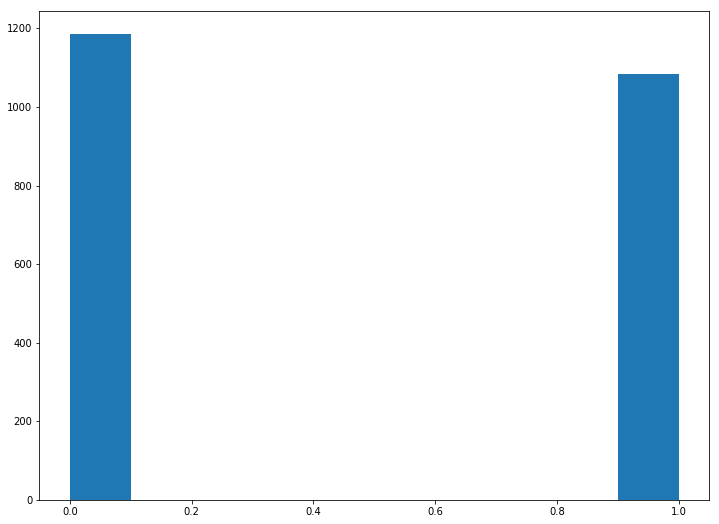

In [39]:
plt.figure(figsize = (12,9))
plt.hist(preds)

In [40]:
lgr_final_product = np.array(list(zip(X_test, preds)))
lgr_final_product = pd.DataFrame(lgr_final_product, columns=['tweet', 'closure'])
lgr_final_product = lgr_final_product.to_csv('lgr_final_product.csv', index = False)

### EVERYTHING BELOW HERE IS TRASH SO YOU CAN SEE MY TRASH.


In [ ]:


#campfire_lst = []

#for i in df_campfire:
#    if i in text == True:
#        campfire_lst.extend(i)
#    else:
#        continue
#    print(campfire_lst)

In [ ]:
#X_train_df = pd.DataFrame(X_train)

#X_train_df = pd.DataFrame(X_train.toarray(), columns=cvec.get_feature_names())

#X_train_df.head()



#X#_test = cvec.transform()
#X_test_df = pd.DataFrame(X_test.toarray(), columns=cvec.get_feature_names())
#X_test_df.head()

#cvec.transform(X_test)

In [ ]:
#for i in range(len(X_test_df)):
#    if i != 0:
#        print(X_test_df.loc[i])